<a href="https://colab.research.google.com/github/pavel7479/For_resume/blob/main/%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BE%D0%B2_%D0%BA__%D0%BF%D0%BE%D0%B4%D0%B0%D1%87%D0%B5_%D0%B2__OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка изображений

In [ ]:
# @title Импорт и подключение Google диска

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Список изображений выбранный произвольно
images_list = ['/content/drive/MyDrive/Стажировка2/Crop_images/datset_AF/nums_dataset/A050TE174/photo1.jpg',
               '/content/drive/MyDrive/Стажировка2/Crop_images/foto_test1001_crop_1.jpg',
               '/content/drive/MyDrive/Стажировка2/Crop_images/foto_test1002_crop_1.jpg',
               '/content/drive/MyDrive/Стажировка2/Crop_images/foto_test1004_crop_1.jpg',
               '/content/drive/MyDrive/Стажировка2/Crop_images/foto_test1007_crop_1.jpg'
              ]

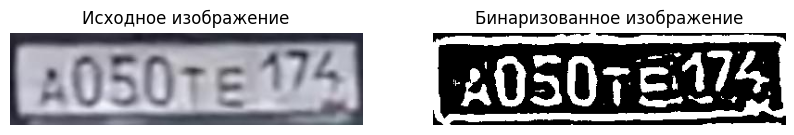

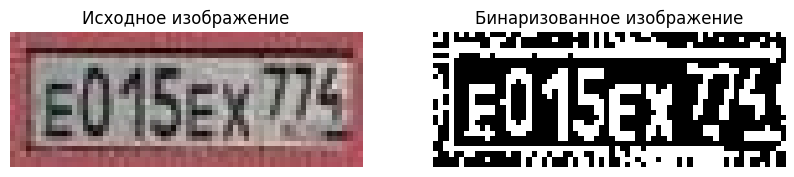

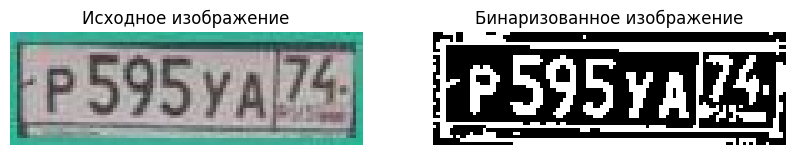

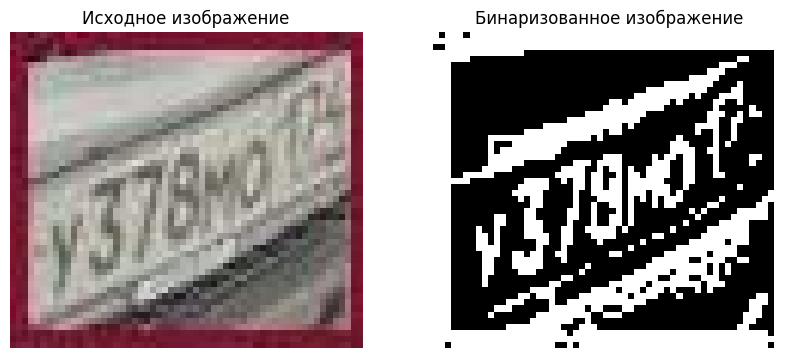

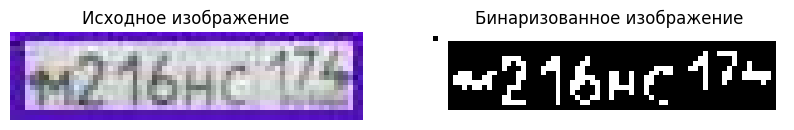

In [ ]:
# @title Перевод изображения в ч/б формат

binary_image_list = []

for image in images_list:
  image = cv2.imread(image)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, 4) # применим адаптивную бинаризацию
  binary_image_list.append(binary_image)
  plt.figure(figsize=(10, 5))

  # Оригинальное изображение
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Преобразование BGR в RGB для корректного отображения
  plt.title('Исходное изображение')
  plt.axis('off')

  # Бинаризованное изображение
  plt.subplot(1, 2, 2)
  plt.imshow(binary_image, cmap='gray')
  plt.title('Бинаризованное изображение')
  plt.axis('off')

  plt.show()

In [ ]:
import os

# Путь для сохранения изображений на Google Диске
output_folder = '/content/drive/MyDrive/Стажировка2/binary_images'  # Укажите вашу папку на Google Диске

image_filenames = ['image1', 'image2', 'image3', 'image4', 'image5']  # Список имён для файлов

# Сохранение каждого изображения
for i, binary_image in enumerate(binary_image_list):
    # Путь для каждого изображения
    output_path = os.path.join(output_folder, f'{image_filenames[i]}.jpg')

    # Сохранение изображения в формате JPG
    cv2.imwrite(output_path, binary_image)

    print(f"Изображение {output_path} успешно сохранено.")


Изображение /content/drive/MyDrive/Стажировка2/binary_images/image1.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_images/image2.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_images/image3.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_images/image4.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_images/image5.jpg успешно сохранено.


In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((1, 2), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 2))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))

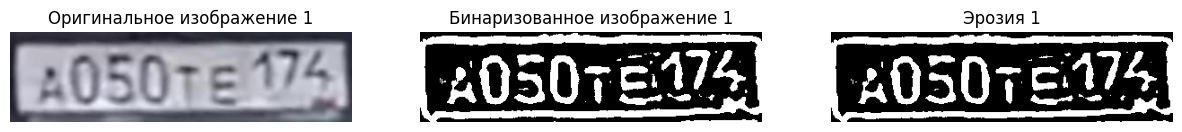

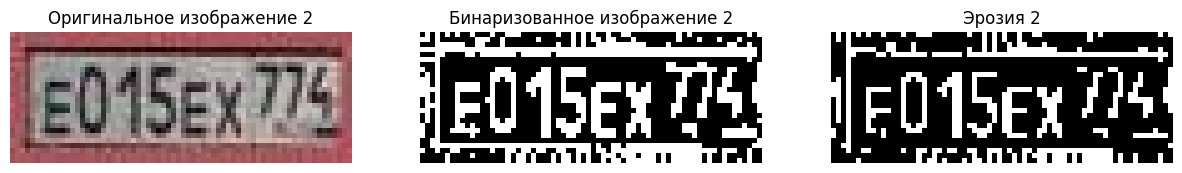

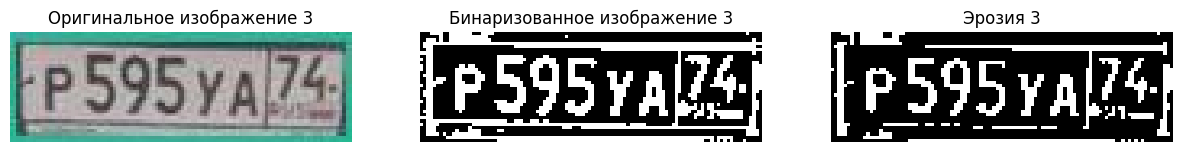

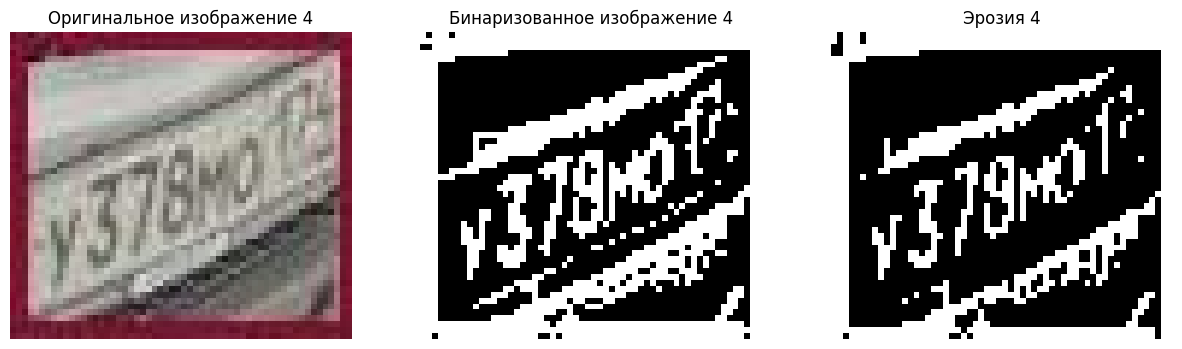

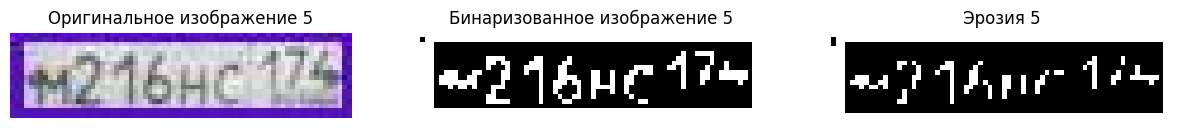

In [ ]:
# @title Отображение оригинального, бинаризованного и эрозированного изображения

# Проход по спискам изображений
for i, (path, binary_image) in enumerate(zip(images_list, binary_image_list)):
    # Чтение оригинального изображения
    original_image = cv2.imread(path)

    # Применение эрозии к бинаризованному изображению
    eroded_image = cv2.erode(binary_image, kernel_ellipse, iterations=1)

    # Отображение оригинального, бинаризованного и эрозированного изображения
    plt.figure(figsize=(15, 5))

    # Оригинальное изображение
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Оригинальное изображение {i+1}')
    plt.axis('off')

    # Бинаризованное изображение
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Бинаризованное изображение {i+1}')
    plt.axis('off')

    # Эрозированное изображение
    plt.subplot(1, 3, 3)
    plt.imshow(eroded_image, cmap='gray')
    plt.title(f'Эрозия {i+1}')
    plt.axis('off')

    plt.show()


In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((2, 2), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))

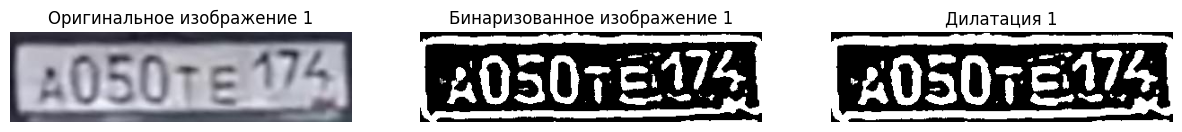

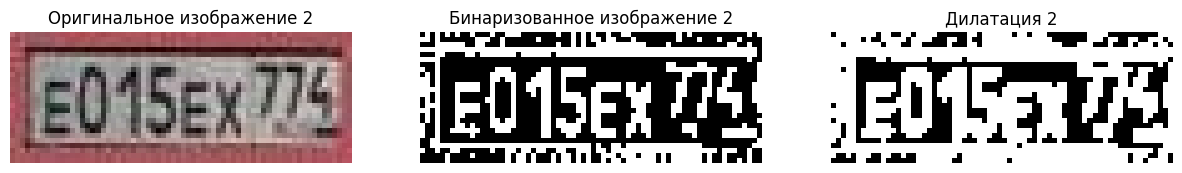

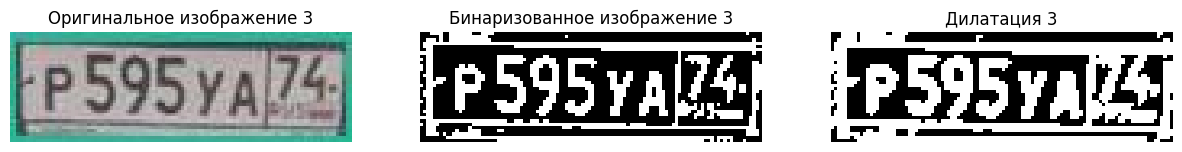

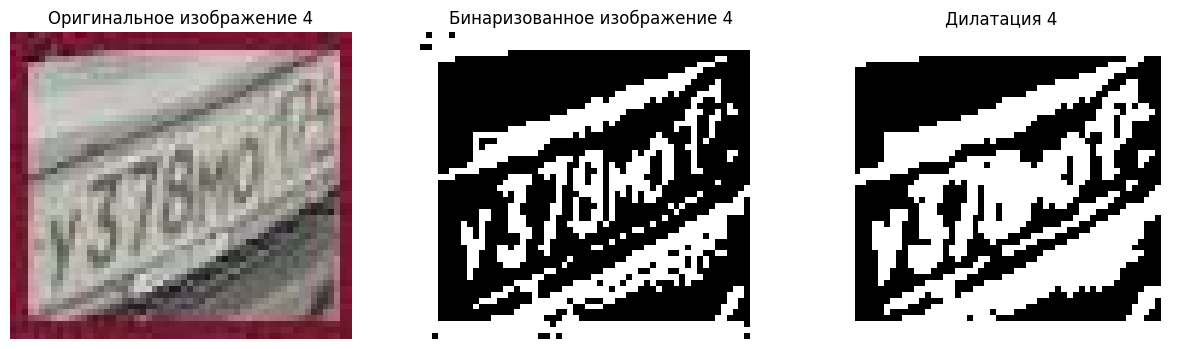

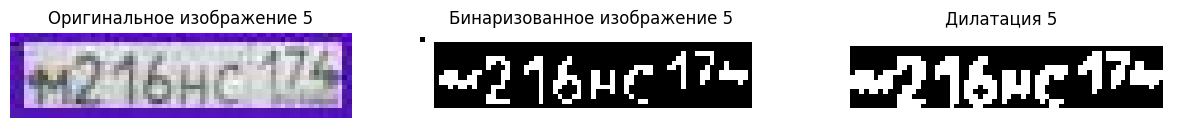

In [ ]:
# @title Отображение оригинального, бинаризованного и дилатационного изображения

dilate_image_list = []

# Проход по спискам изображений
for i, (path, binary_image) in enumerate(zip(images_list, binary_image_list)):
    # Чтение оригинального изображения
    original_image = cv2.imread(path)

    # Применение эрозии к бинаризованному изображению
    eroded_image = cv2.dilate(binary_image, kernel_cross, iterations=1)

    dilate_image_list.append(eroded_image)
    # Отображение оригинального, бинаризованного и эрозированного изображения
    plt.figure(figsize=(15, 5))

    # Оригинальное изображение
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Оригинальное изображение {i+1}')
    plt.axis('off')

    # Бинаризованное изображение
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Бинаризованное изображение {i+1}')
    plt.axis('off')

    # Эрозированное изображение
    plt.subplot(1, 3, 3)
    plt.imshow(eroded_image, cmap='gray')
    plt.title(f'Дилатация {i+1}')
    plt.axis('off')

    plt.show()


In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((2, 2), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))

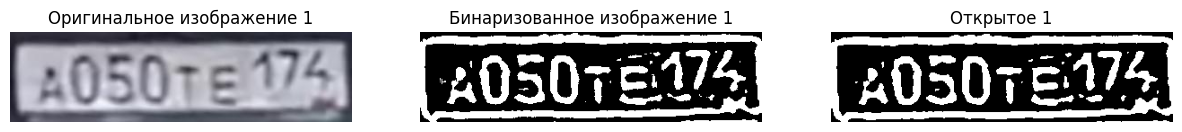

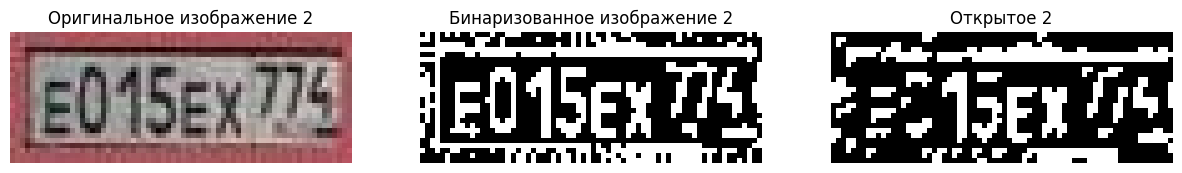

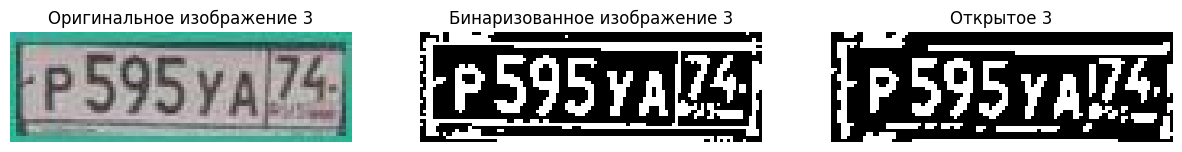

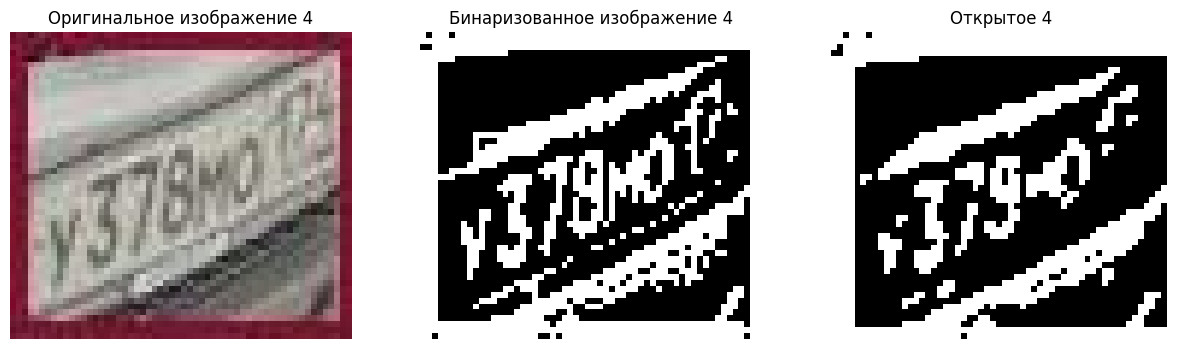

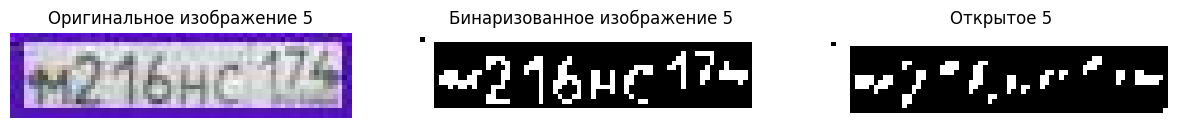

In [ ]:
# @title Отображение оригинального, бинаризованного и открытого изображения

# Проход по спискам изображений
for i, (path, binary_image) in enumerate(zip(images_list, binary_image_list)):
    # Чтение оригинального изображения
    original_image = cv2.imread(path)

    # Применение Открытия (Эрозия, затем Дилатация)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_cross)

    # Отображение оригинального, бинаризованного и эрозированного изображения
    plt.figure(figsize=(15, 5))

    # Оригинальное изображение
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Оригинальное изображение {i+1}')
    plt.axis('off')

    # Бинаризованное изображение
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Бинаризованное изображение {i+1}')
    plt.axis('off')

    # Эрозированное изображение
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title(f'Открытое {i+1}')
    plt.axis('off')

    plt.show()

In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((5, 5), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))

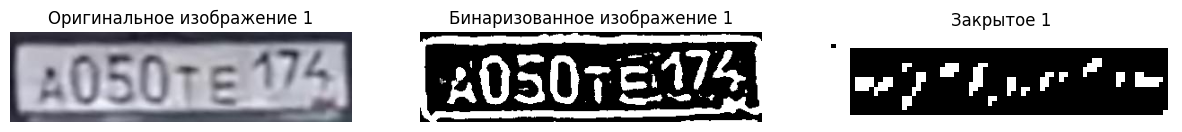

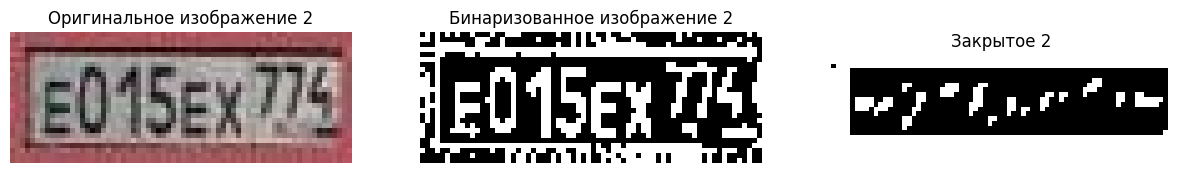

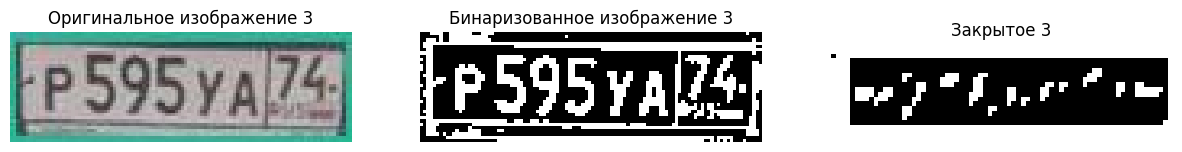

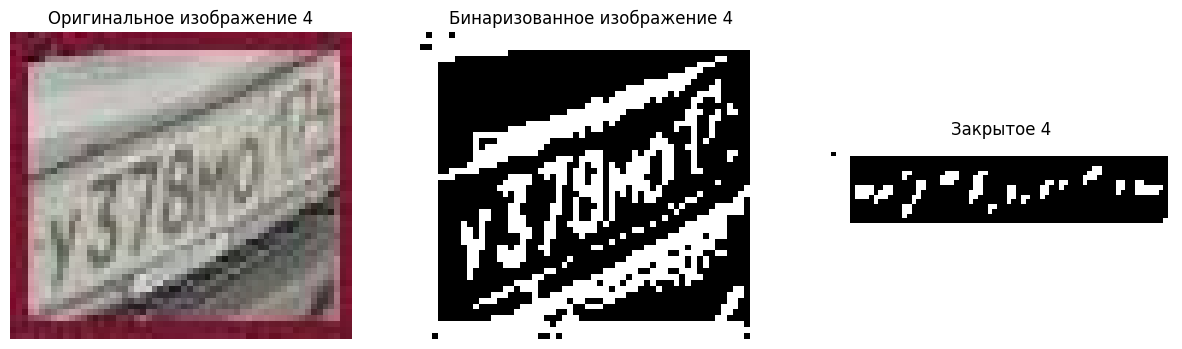

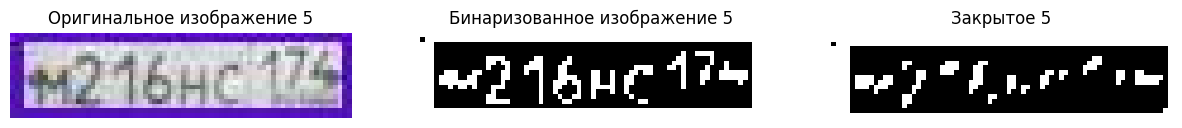

In [ ]:
# @title Отображение оригинального, бинаризованного и закрытого изображения

# Проход по спискам изображений
for i, (path, binary_image) in enumerate(zip(images_list, binary_image_list)):
    # Чтение оригинального изображения
    original_image = cv2.imread(path)

    # Применение Открытия (Эрозия, затем Дилатация)
    close_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel_cross)

    # Отображение оригинального, бинаризованного и эрозированного изображения
    plt.figure(figsize=(15, 5))

    # Оригинальное изображение
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Оригинальное изображение {i+1}')
    plt.axis('off')

    # Бинаризованное изображение
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Бинаризованное изображение {i+1}')
    plt.axis('off')

    # Эрозированное изображение
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title(f'Закрытое {i+1}')
    plt.axis('off')

    plt.show()

# После Дилатации делаем Открытие

In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((1, 2), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 2))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, 2))

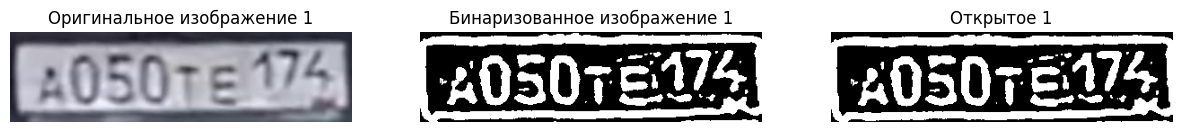

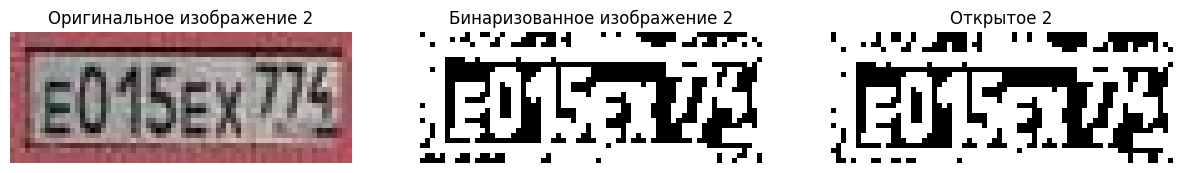

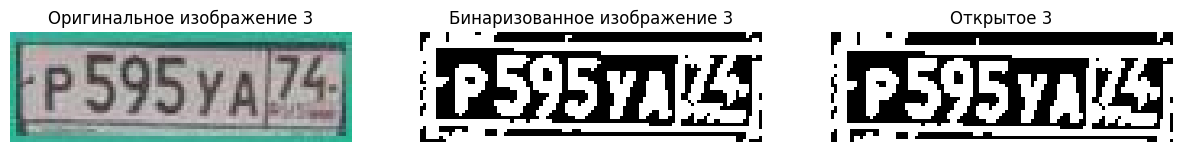

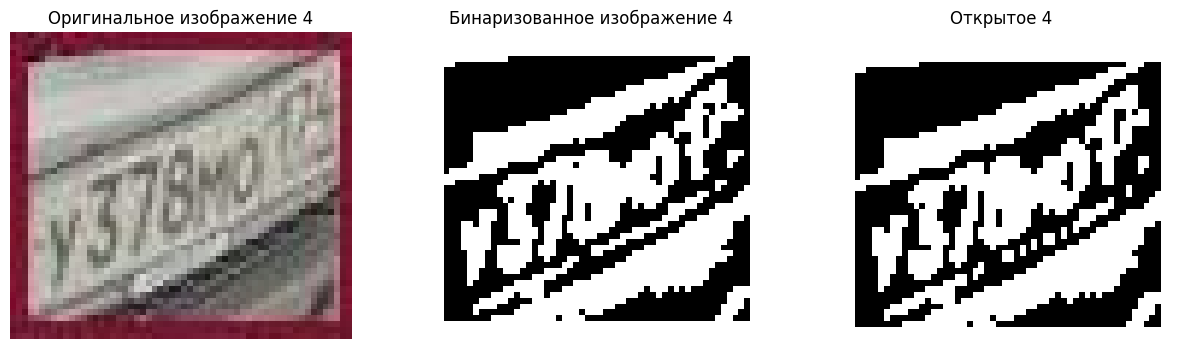

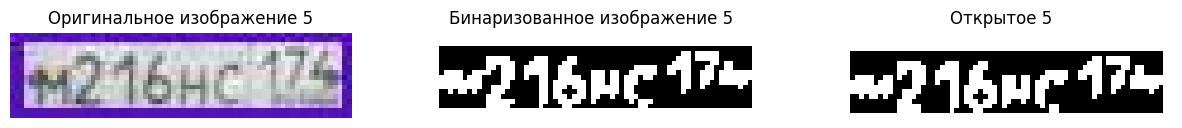

In [ ]:
# @title Отображение оригинального, бинаризованного и открытого изображения

dilate_and_open_image_list = []

# Проход по спискам изображений
for i, (path, binary_image) in enumerate(zip(images_list, dilate_image_list)):
    # Чтение оригинального изображения
    original_image = cv2.imread(path)

    # Применение Открытия (Эрозия, затем Дилатация)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_cross)
    dilate_and_open_image_list.append(opened_image)
    # Отображение оригинального, бинаризованного и эрозированного изображения
    plt.figure(figsize=(15, 5))

    # Оригинальное изображение
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Оригинальное изображение {i+1}')
    plt.axis('off')

    # Бинаризованное изображение
    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Бинаризованное изображение {i+1}')
    plt.axis('off')

    # Эрозированное изображение
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title(f'Открытое {i+1}')
    plt.axis('off')

    plt.show()

In [ ]:
import os

# Путь для сохранения изображений на Google Диске
output_folder = '/content/drive/MyDrive/Стажировка2/binary_and_open_images'  # Укажите вашу папку на Google Диске

image_filenames = ['image1', 'image2', 'image3', 'image4', 'image5']  # Список имён для файлов

# Сохранение каждого изображения
for i, binary_image in enumerate(dilate_and_open_image_list):
    # Путь для каждого изображения
    output_path = os.path.join(output_folder, f'{image_filenames[i]}.jpg')

    # Сохранение изображения в формате JPG
    cv2.imwrite(output_path, binary_image)

    print(f"Изображение {output_path} успешно сохранено.")


Изображение /content/drive/MyDrive/Стажировка2/binary_and_open_images/image1.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_and_open_images/image2.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_and_open_images/image3.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_and_open_images/image4.jpg успешно сохранено.
Изображение /content/drive/MyDrive/Стажировка2/binary_and_open_images/image5.jpg успешно сохранено.


# Используем OCR

In [ ]:
# Установка библиотеки.
!pip -q install easyocr

import easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 17.5 MB/s eta 0:00:00


In [ ]:
%%time
#Распознавание  текста
reader = easyocr.Reader(['en'])
img = cv2.imread('/content/drive/MyDrive/Стажировка2/binary_images/image1.jpg')
results = reader.readtext(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

CPU times: user 9.67 s, sys: 1.6 s, total: 11.3 s
Wall time: 12.8 s


In [ ]:
for result in results:
    print(f"Текст: {result[1]}, Вероятность: {result[2]}")


Текст: K05052124, Вероятность: 0.12074619765916107


In [ ]:
%%time
#Распознавание  текста
reader = easyocr.Reader(['en'])
img = cv2.imread('/content/drive/MyDrive/Стажировка2/binary_and_open_images/image1.jpg')
results = reader.readtext(img)

CPU times: user 3.15 s, sys: 468 ms, total: 3.62 s
Wall time: 3.84 s


In [ ]:
for result in results:
    print(f"Текст: {result[1]}, Вероятность: {result[2]}")

Текст: K05052174, Вероятность: 0.18817934159931796


In [ ]:
image_path = '/content/drive/MyDrive/Стажировка2/binary_images/image4.jpg'  # Укажите путь к вашему изображению

In [ ]:

# Загрузка изображения

image = cv2.imread(image_path)

# Увеличиваем изображение
scale_percent = 1000  # Увеличение на 200%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

# Изменение размера изображения
resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# Сохранение увеличенного изображения
cv2.imwrite('resized_image.jpg', resized_image)


True

In [ ]:
# Определение ядра для морфологических операций
kernel = np.ones((15, 15), np.uint8)

# Круглое ядро
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# Крестовидное ядро
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))

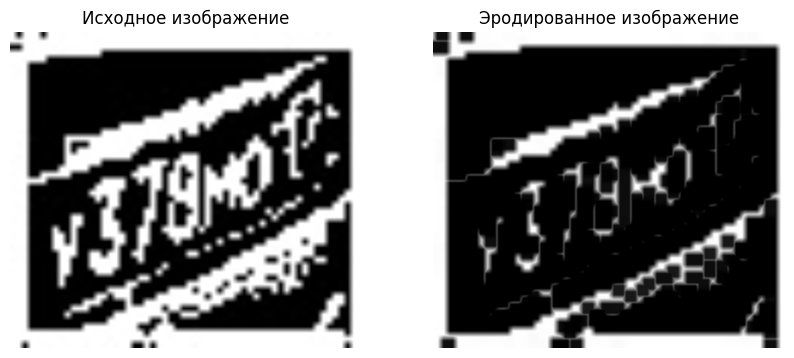

In [ ]:

# Загрузка изображения
image_path = '/content/resized_image.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем изображение в градациях серого


# Применяем эрозию
eroded_image = cv2.erode(image, kernel, iterations=1)

# Отображаем исходное и эродированное изображения
plt.figure(figsize=(10,5))

# Исходное изображение
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Эродированное изображение
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Эродированное изображение')
plt.axis('off')

# Показать изображения
plt.show()



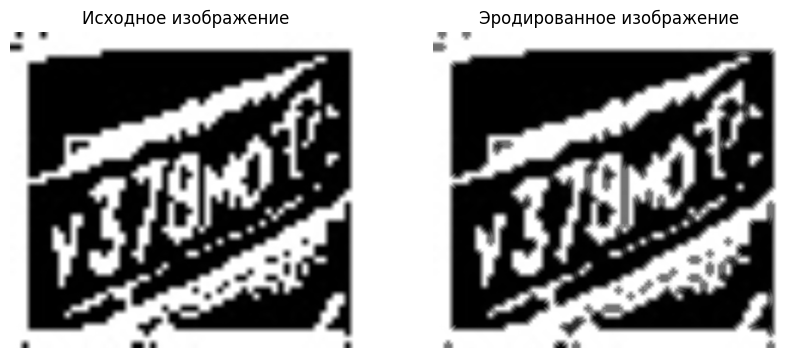

In [ ]:
# Загрузка изображения
image_path = '/content/resized_image.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Загружаем изображение в градациях серого


# Применяем эрозию
eroded_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_cross)

# Отображаем исходное и эродированное изображения
plt.figure(figsize=(10,5))

# Исходное изображение
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Эродированное изображение
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Эродированное изображение')
plt.axis('off')

# Показать изображения
plt.show()